### Assignment – Preprocessing Data for scikit-learn

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np
import scipy
import sklearn
from pandas import *

%matplotlib inline
sns.set_style("darkgrid")

#### Get dateset from https://archive.ics.uci.edu/ml/datasets/Mushroom

First study the dataset and the associated description of the data (i.e. “data dictionary”)

#### Create a pandas DataFrame with a subset of the columns in the dataset.

Lets examine the the default datase

In [2]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                   header=None)

In [3]:
df.head()

,0
0,"p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u"
1,"e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g"
2,"e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m"
3,"p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u"
4,"e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g"


We have no idea what this means. 

Let's explore the data dictionary https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.names

In [4]:
df = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data',
                   header=None,
                   sep=',',
                  names=['classes', 'cap_shape', 'cap_surface', 'cap_color', 'bruises?', 'odor', 
                         'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
                         'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
                        'stalk_color_above_ring', 'stalk_color_below_ring',
                        'veil_type', 'veil_color', 'ring_number', 'ring_type',
                        'spore_print_color', 'population', 'habitat'])

In [5]:
for col in df:
    print df[col].unique()

['p' 'e']
['x' 'b' 's' 'f' 'k' 'c']
['s' 'y' 'f' 'g']
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
['t' 'f']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['f' 'a']
['c' 'w']
['n' 'b']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
['e' 't']
['e' 'c' 'b' 'r' '?']
['s' 'f' 'k' 'y']
['s' 'f' 'y' 'k']
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
['p']
['w' 'n' 'o' 'y']
['o' 't' 'n']
['p' 'e' 'l' 'f' 'n']
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
['s' 'n' 'a' 'v' 'y' 'c']
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [6]:
df.head()

,classes,cap_shape,cap_surface,cap_color,bruises?,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df1 = df[['classes', 'odor', 'gill_color']]

In [8]:
df1.head()

,classes,odor,gill_color
0,p,p,k
1,e,a,k
2,e,l,n
3,p,p,n
4,e,n,k


check for null

In [9]:
df1.isnull().sum()

classes       0
odor          0
gill_color    0
dtype: int64

Let's find unique values in each column

In [10]:
for col in df1:
    print df1[col].unique()

['p' 'e']
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']


#### Replace the codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.

In [11]:
df1.classes[df1.classes == 'p'] = 1
df1.classes[df1.classes == 'e'] = 0

C:\ProgramData\Anaconda2\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2878: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
df1.head()

,classes,odor,gill_color
0,1,p,k
1,0,a,k
2,0,l,n
3,1,p,n
4,0,n,k


In [13]:
for col in df1:
    print df1[col].unique()

[1 0]
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']


In [14]:
df1['odor'] = df1['odor'].replace(['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'], 
                                  ['almond','anise','creosote','fishy','foul', 'musty','none','pungent','spicy'])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
df1.head()

,classes,odor,gill_color
0,1,pungent,k
1,0,almond,k
2,0,anise,n
3,1,pungent,n
4,0,none,k


In [16]:
df1['gill_color'] = df1['gill_color'].replace(['k','n','b','h','g','r','o','p','u','e', 'w','y' ], 
                                              ['black','brown','buff','chocolate','gray', 'green','orange','pink','purple','red', 'white','yellow'])

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
df1.head()

,classes,odor,gill_color
0,1,pungent,black
1,0,almond,black
2,0,anise,brown
3,1,pungent,brown
4,0,none,black


#### Perform exploratory data analysis: show the distribution of data for each of the columns you selected

''

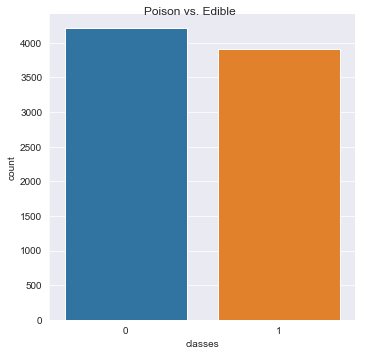

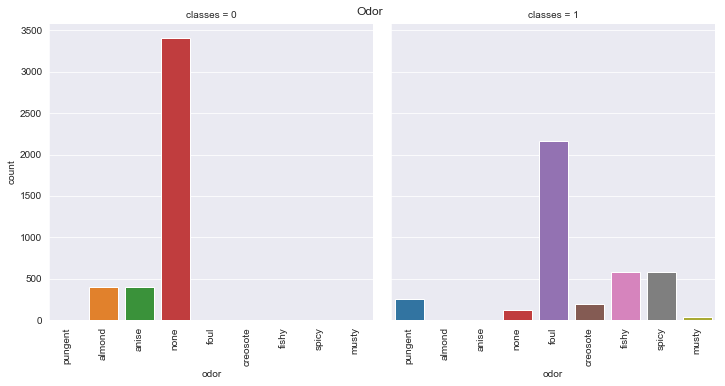

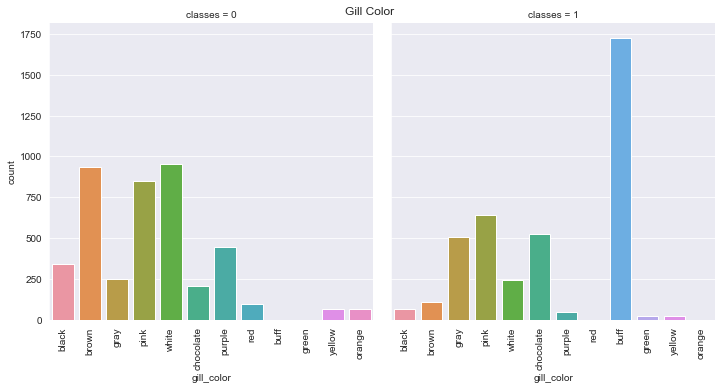

In [18]:
a = sns.catplot(x="classes", kind="count", legend=True, data=df1)
fig1 = a.fig
fig1.suptitle("Poison vs. Edible")
;


b = sns.catplot(x="odor", kind="count", col='classes', data=df1)
fig2 = b.fig
fig2.suptitle("Odor")
b.set_xticklabels(rotation=90)
;

c = sns.catplot(x="gill_color", kind="count", col='classes', data=df1)
fig3 = c.fig
fig3.suptitle("Gill Color")
c.set_xticklabels(rotation=90)
;

#### show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.

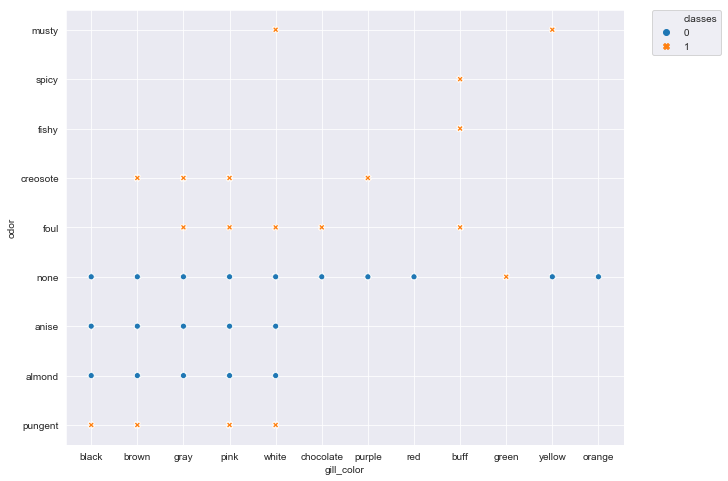

In [33]:
e = sns.scatterplot(x="gill_color", y="odor", hue='classes',style='classes', data=df1)
e.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
rcParams['figure.figsize'] = 10,8

#### FINDINGS

As we can see from the distribution and the scatter plot above, odor and gill color isn't enough to distinguish a poison mushroom from an edible one.